# Undiscounted random chain, 100 episodes

In [51]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the different CSVs as DataFrames

In [52]:
in_parent_dir = '/Users/anthony/Playground/tensorboard_logs/10-03/100epis'
exp_csv_regex = 'exp*/progress.csv'

exp_csv_pathlist = glob.glob(os.path.join(in_parent_dir, exp_csv_regex))
exp_csv_pathlist

['/Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp19_STrace_100epis/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp23_SR_trueR_100epis/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp12_LambRet_100epis/progress.csv']

#### Read all CSVs into a single dataframe

In [53]:
# Read all
exp_df_lists = []
for csv_path in exp_csv_pathlist:
    print('Reading:', csv_path)
    cur_df = pd.read_csv(csv_path, sep='\|\|')
    
    cur_df = cur_df.drop(cur_df.columns[0], axis=1)
    
    exp_df_lists.append(cur_df)

# Concat
data_df = pd.concat(exp_df_lists)

print(len(data_df))
data_df[0:5]

Reading: /Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp19_STrace_100epis/progress.csv


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Reading: /Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp23_SR_trueR_100epis/progress.csv
Reading: /Users/anthony/Playground/tensorboard_logs/10-03/100epis/exp12_LambRet_100epis/progress.csv


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


1300000


,agentCls_name,cumulative_reward,episode_idx,gamma,lamb,lr,n_states,num_episodes,s_mat_norm,s_mat_rmse,s_subsample_prop,seed,total_steps,use_rand_s_mat,use_true_r_fn,use_true_s_mat,v_vec_avg,v_vec_max,v_vec_min,v_vec_rmse
0,STraceAgent,1.0,0,1.0,1.0,0.0001,19,100,None,6.79241,0.05,0,30,NaN,NaN,False,0.500105,0.500738,0.500000,0.273733
1,STraceAgent,1.0,1,1.0,1.0,0.0001,19,100,None,6.79239,0.05,0,114,NaN,NaN,False,0.500245,0.501237,0.500005,0.273604
2,STraceAgent,1.0,2,1.0,1.0,0.0001,19,100,None,6.79236,0.05,0,232,NaN,NaN,False,0.500403,0.502086,0.500005,0.273463
3,STraceAgent,1.0,3,1.0,1.0,0.0001,19,100,None,6.79236,0.05,0,22,NaN,NaN,False,0.500500,0.502584,0.500005,0.273336
4,STraceAgent,1.0,4,1.0,1.0,0.0001,19,100,None,6.79234,0.05,0,102,NaN,NaN,False,0.500637,0.503247,0.500005,0.273181


## Get runs form a specific episode

In [70]:
epis_idx_filter = 99

epis_data_df = data_df[data_df['episode_idx']==epis_idx_filter]

print(len(epis_data_df))
epis_data_df[0:3]

13000


,agentCls_name,cumulative_reward,episode_idx,gamma,lamb,lr,n_states,num_episodes,s_mat_norm,s_mat_rmse,s_subsample_prop,seed,total_steps,use_rand_s_mat,use_true_r_fn,use_true_s_mat,v_vec_avg,v_vec_max,v_vec_min,v_vec_rmse
99,STraceAgent,1.0,99,1.0,1.0,0.0001,19,100,None,6.79116,0.05,0,108,NaN,NaN,False,0.500910,0.529996,0.474325,0.261044
199,STraceAgent,1.0,99,1.0,1.0,0.0001,19,100,None,6.7912,0.05,2,62,NaN,NaN,False,0.499405,0.525929,0.470387,0.261348
299,STraceAgent,1.0,99,1.0,1.0,0.0001,19,100,None,6.79106,0.05,4,46,NaN,NaN,False,0.498819,0.525205,0.469570,0.261075


#### Get different sub-DataFrames depending on the run

In [71]:
from itertools import product

indep_cols = ['agentCls_name', 'use_true_s_mat']

# Get all the different combinations of independent cols
indep_col_val_list = []
for indep_col in indep_cols:
    indep_col_val_list.append( list(set(epis_data_df[indep_col].values)) )
indep_col_val_cartesian_prod = product(*indep_col_val_list)

# Filter for sub-dataframes, one for each combination
indep_col_df_dict = {}

for val_tup in indep_col_val_cartesian_prod:    
    # Filter
    cur_df = epis_data_df.copy(deep=True)
    for i in range(len(indep_cols)):
        cur_indep_col = indep_cols[i]
        cur_df = cur_df[cur_df[cur_indep_col] == val_tup[i]]
    
    # Save
    if len(cur_df) > 0:
        cur_comb_name = '_'.join([str(e) for e in list(val_tup)])
        indep_col_df_dict[cur_comb_name] = cur_df
    
# Print
for k in indep_col_df_dict:
    print(k, len(indep_col_df_dict[k]))

STraceAgent_False 5850
LambdaAgent_False 6300
SRAgent_False 850


### Plot RMSE

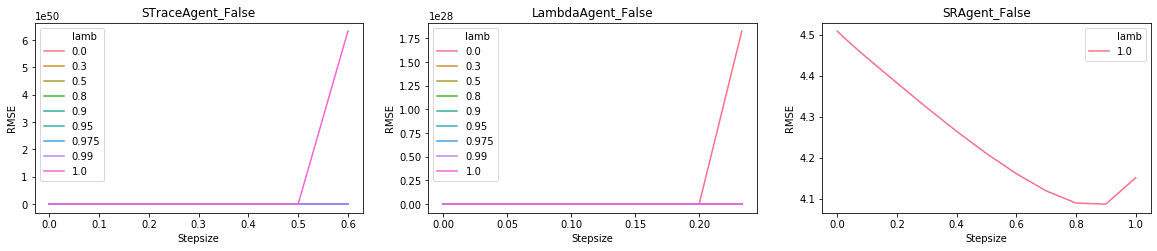

In [125]:
# ==
# Specify plots
plot_x = 'lr'
plot_y = 'v_vec_rmse'
plot_hue = 'lamb'
plot_ci = None  # Estimator, [None, 'sd']


# ==
# Plot

plt.figure(figsize=(20, 3.5))

# Generate subplots
total_n_plots = len(indep_col_df_dict)
n_plot_counter = 1
for k in indep_col_df_dict:
    # Current
    cur_df = indep_col_df_dict[k]
    
    # Generate palette
    n_hues = len(set(cur_df[plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)
    
    # Plot
    plt.subplot(1, total_n_plots, n_plot_counter)
    sns.lineplot(x=plot_x, y=plot_y, hue=plot_hue, 
                 ci=plot_ci, 
                 palette = c_palette,
                 data=cur_df)
    
    
    #plt.ylim([0, 0.3])
    plt.ylabel('RMSE')
    plt.xlabel('Stepsize')
    plt.title(str(k))
    
    # Counter var
    n_plot_counter += 1
    


#### Group things

In [73]:
grouped_epis_df = epis_data_df.groupby(['agentCls_name', 'lamb', 'lr']).mean()
grouped_epis_df = grouped_epis_df[grouped_epis_df['v_vec_rmse']<0.05]

del grouped_epis_df['cumulative_reward']
del grouped_epis_df['gamma']
del grouped_epis_df['n_states']
del grouped_epis_df['num_episodes']
del grouped_epis_df['s_subsample_prop']
del grouped_epis_df['seed']
del grouped_epis_df['total_steps']
del grouped_epis_df['episode_idx']

grouped_epis_df

use_true_s_mat  v_vec_avg  v_vec_max  v_vec_min  \
agentCls_name lamb  lr                                                          
LambdaAgent   0.300 0.100000           False   0.506237   0.945313   0.071074   
              0.500 0.066667           False   0.506041   0.927399   0.082705   
                    0.100000           False   0.507133   0.952648   0.064421   
              0.800 0.033333           False   0.506590   0.909145   0.100507   
              0.900 0.026667           False   0.507277   0.904947   0.103545   
                    0.033333           False   0.507658   0.926004   0.081405   
STraceAgent   0.300 0.080000           False   0.502811   0.983302   0.019338   
                    0.100000           False   0.502961   0.990737   0.010877   
              0.500 0.080000           False   0.503318   0.992529   0.008889   
              0.800 0.020000           False   0.503705   0.971901   0.032598   
              0.900 0.010000           False   0.504217   0.972449   0.031989   
              0.950 0.005000           False   0.504458   0.973015   0.031350   
              0.975 0.005000           False   0.504533   0.973068   0.031294   
              0.990 0.005000           False   0.504580   0.973100   0.031261   
              1.000 0.005000           False   0.504611   0.973121   0.031239   

                              v_vec_rmse  
agentCls_name lamb  lr                    
LambdaAgent   0.300 0.100000    0.049133  
              0.500 0.066667    0.043244  
                    0.100000    0.045685  
              0.800 0.033333    0.043688  
              0.900 0.026667    0.046028  
                    0.033333    0.049046  
STraceAgent   0.300 0.080000    0.044480  
                    0.100000    0.036982  
              0.500 0.080000    0.037500  
              0.800 0.020000    0.021774  
              0.900 0.010000    0.028101  
              0.950 0.005000    0.031819  
              0.975 0.005000    0.032847  
              0.990 0.005000    0.033487  
              1.000 0.005000    0.033923

## Plot training progress

In [59]:
tmp_df = data_df.copy(deep=True)
tmp_df = tmp_df[tmp_df['agentCls_name']=='LambdaAgent']
sorted(list(set(tmp_df['lr'].values)))

[3.333333333333333e-05,
 0.0003333333333333333,
 0.0016666666666666668,
 0.0033333333333333327,
 0.006666666666666667,
 0.013333333333333334,
 0.02666666666666667,
 0.03333333333333333,
 0.06666666666666668,
 0.1,
 0.13333333333333333,
 0.16666666666666666,
 0.2,
 0.2333333333333333]

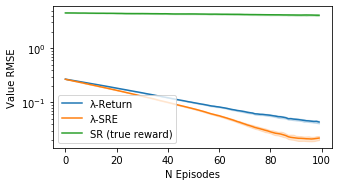

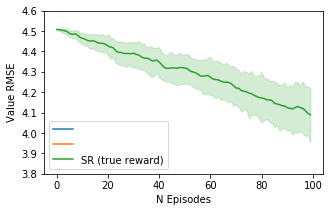

In [151]:
# ==
# Filter for dataframe
cur_df = data_df.copy(deep=True)

# Make the Lambda return agent
cur_df1 = cur_df[cur_df['agentCls_name']=='LambdaAgent']
cur_df1 = cur_df1[cur_df1['lamb'] == 0.5]
cur_df1 = cur_df1[cur_df1['lr'] == 0.06666666666666668]

# Make the STrace agent dataframe
cur_df2 = cur_df[cur_df['agentCls_name']=='STraceAgent']
cur_df2 = cur_df2[cur_df2['lamb'] == 0.8]
cur_df2 = cur_df2[cur_df2['lr'] == 0.02]

# Make the SR agent dataframe
cur_df3 = cur_df[cur_df['agentCls_name']=='SRAgent']
cur_df3 = cur_df3[cur_df3['lr'] == 0.8]


# ==
# Generate plots

plt.figure(figsize=(5,2.6))

sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=200, data=cur_df1)
sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=200, data=cur_df2)
sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=200, data=cur_df3)

#plt.ylim([-0.01, 0.28])
plt.yscale('log')
plt.legend(['λ-Return', 'λ-SRE','SR (true reward)'], loc=3)
plt.ylabel('Value RMSE')
plt.xlabel('N Episodes')

plt.plot()



plt.figure(figsize=(5,3))

sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=1, data=cur_df1)
sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=1, data=cur_df2)
sns.lineplot(x='episode_idx', y='v_vec_rmse', ci=95, n_boot=200, data=cur_df3)

plt.legend(['', '', 'SR (true reward)'], loc=3)
plt.ylim([3.8, 4.6])
plt.ylabel('Value RMSE')
plt.xlabel('N Episodes')



#plt.yscale('log')

plt.show()
